In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import pickle

# Read CSV files
ratings = pd.read_csv("ratings.csv", names=['User_ID', 'Food_ID', 'Rating'])
food = pd.read_csv("1662574418893344.csv", names=["Food_ID", "Name", "C_Type", "Veg_Non", "Describe"])

# Convert ratings to numeric data (handle errors gracefully)
try:
  ratings['Rating'] = pd.to_numeric(ratings['Rating'], errors='coerce')
  ratings['User_ID'] = pd.to_numeric(ratings['User_ID'], errors='coerce')
  ratings['Food_ID'] = pd.to_numeric(ratings['Food_ID'], errors='coerce')
  food['Food_ID'] = pd.to_numeric(food['Food_ID'], errors='coerce')
except:
  print("Error converting data to numeric. Check data types in CSV files.")

# Create a pivot table for recommendations
recommender_pivot = ratings.pivot_table(columns='User_ID', index='Food_ID', values="Rating")
recommender_pivot.fillna(0, inplace=True)

# Combine ratings and food data
food_w_rating = ratings.merge(right=food, on='Food_ID')

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test = train_test_split(recommender_pivot, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Create sparse matrices for training and testing data
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Define the recommendation model (Brute-force for small datasets)
model = NearestNeighbors(algorithm='brute')

# Train the model on the training data
model.fit(X_train_sparse)

# Function to recommend similar foods (using test data for evaluation)
def recommend_similar_food(food_id, num_neighbors=6):
  """
  Recommends similar foods based on user ratings using k-Nearest Neighbors.

  Args:
      food_id (int): The ID of the food in the testing set for which to recommend similar items.
      num_neighbors (int, optional): The number of similar foods to recommend. Defaults to 6.

  Returns:
      list: A list of food IDs (indices) corresponding to recommended foods (from the testing set).
  """
  try:
    # Get the index of the food ID in the testing set (assuming it exists)
    test_food_index = X_test.index.get_loc(food_id)

    # Get distances and suggestions for the given food from the testing set
    distance, suggestion = model.kneighbors(X_test_sparse[test_food_index].toarray().reshape(1, -1), n_neighbors=num_neighbors)

    # Return the recommended food IDs (from the testing set)
    return suggestion[0].tolist()
  except (KeyError, ValueError):  # Handle cases where food_id is not found in the testing set
    print(f"Food ID {food_id} not found in the testing data.")
    return []

# Get recommendations for a specific food ID from the testing set (replace with desired ID)
test_food_id = 26  # Assuming food_id 26 is in the testing set
recommended_food_ids = recommend_similar_food(test_food_id)

# Function to get food names from IDs
def get_food_names(food_ids):
  """
  Retrieves the names of foods corresponding to a list of food IDs.

  Args:
      food_ids (list): A list of food IDs.

  Returns:
      list: A list of food names.
  """
  return food['Name'].iloc[food_ids].tolist()




['almond pearls',
 'lamb rogan josh',
 'cheese and avocado parantha',
 'chocolate chip cheesecake',
 'cinnamon star cookies',
 'coconut lime quinoa salad']

In [1]:
# Import necessary libraries
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import pickle

# Read CSV files
ratings = pd.read_csv("ratings.csv", names=['User_ID', 'Food_ID', 'Rating'])
food = pd.read_csv("1662574418893344.csv", names=["Food_ID", "Name", "C_Type", "Veg_Non", "Describe"])

# Convert ratings to numeric data (handle errors gracefully)
try:
  ratings['Rating'] = pd.to_numeric(ratings['Rating'], errors='coerce')
  ratings['User_ID'] = pd.to_numeric(ratings['User_ID'], errors='coerce')
  ratings['Food_ID'] = pd.to_numeric(ratings['Food_ID'], errors='coerce')
  food['Food_ID'] = pd.to_numeric(food['Food_ID'], errors='coerce')
except:
  print("Error converting data to numeric. Check data types in CSV files.")

# Create a pivot table for recommendations
recommender_pivot = ratings.pivot_table(columns='User_ID', index='Food_ID', values="Rating")
recommender_pivot.fillna(0, inplace=True)

# Combine ratings and food data
food_w_rating = ratings.merge(right=food, on='Food_ID')

# Create a sparse matrix for efficient similarity calculations
recommender_sparse = csr_matrix(recommender_pivot)

# Define the recommendation model (Brute-force for small datasets)
model = NearestNeighbors(algorithm='brute')

# Train the model on the sparse matrix
model.fit(recommender_sparse)

# Function to recommend similar foods
def recommend_similar_food(food_id, num_neighbors=6):
  """
  Recommends similar foods based on user ratings using k-Nearest Neighbors.

  Args:
      food_id (int): The ID of the food for which to recommend similar items.
      num_neighbors (int, optional): The number of similar foods to recommend. Defaults to 6.

  Returns:
      list: A list of food IDs (indices) corresponding to recommended foods.
  """
  try:
    # Get distances and suggestions for the given food
    distance, suggestion = model.kneighbors(recommender_pivot.iloc[food_id].values.reshape(1, -1), n_neighbors=num_neighbors)

    # Return the recommended food IDs
    return suggestion[0].tolist()
  except IndexError:
    print(f"Food ID {food_id} not found in the data.")
    return []

# Get recommendations for a specific food ID (replace 26 with the desired ID)
food_id = 26
recommended_food_ids = recommend_similar_food(food_id)

# Function to get food names from IDs
def get_food_names(food_ids):
  """
  Retrieves the names of foods corresponding to a list of food IDs.

  Args:
      food_ids (list): A list of food IDs.

  Returns:
      list: A list of food names.
  """
  return food['Name'].iloc[food_ids].tolist()

# Get names of recommended foods
recommended_food_names = get_food_names(recommended_food_ids)

# Print recommendations
print("Recommended foods for Food ID", food_id, ":")
for i, name in enumerate(recommended_food_names):
  print(f"{i+1}. {name}")




Recommended foods for Food ID 26 :
1. almond pearls
2. lamb rogan josh
3. cheese and avocado parantha
4. chocolate chip cheesecake
5. cinnamon star cookies
6. coconut lime quinoa salad


[(289.0, 1.0), (10.0, 3.0), (58.0, 5.0), (61.0, 6.0), (26.0, 7.0), (64.0, 8.0), (93.0, 9.0), (185.0, 10.0), (245.0, 12.0), (47.0, 13.0), (76.0, 15.0), (164.0, 16.0), (296.0, 17.0), (307.0, 18.0), (285.0, 19.0), (290.0, 20.0), (6.0, 21.0), (156.0, 22.0), (165.0, 23.0), (169.0, 25.0), (74.0, 27.0), (105.0, 29.0), (138.0, 31.0), (207.0, 32.0), (77.0, 36.0), (174.0, 38.0), (114.0, 41.0), (34.0, 42.0), (275.0, 43.0), (252.0, 44.0), (109.0, 45.0), (4.0, 46.0), (83.0, 47.0), (260.0, 48.0), (94.0, 49.0), (102.0, 50.0), (46.0, 52.0), (18.0, 54.0), (198.0, 56.0), (120.0, 57.0), (43.0, 59.0), (25.0, 62.0), (180.0, 63.0), (243.0, 64.0), (298.0, 65.0), (197.0, 67.0), (227.0, 68.0), (8.0, 69.0), (287.0, 70.0), (78.0, 71.0), (115.0, 76.0), (240.0, 77.0), (146.0, 78.0), (85.0, 81.0), (182.0, 82.0), (231.0, 84.0), (302.0, 85.0), (199.0, 86.0), (196.0, 88.0), (211.0, 89.0), (225.0, 90.0), (159.0, 91.0)]


[(289.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (93.0, 5), (93.0, 13), (93.0, 15), (185.0, 5), (185.0, 10), (185.0, 15), (185.0, 30), (185.0, 21), (185.0, 13), (245.0, 66), (245.0, 10), (245.0, 15), (245.0, 21), (245.0, 5), (245.0, 13), (47.0, 192), (47.0, 52), (47.0, 118), (47.0, 126), (47.0, 69), (47.0, 68), (76.0, 118), (76.0, 126)]
[(289.0, 1.0), (10.0, 3.0), (58.0, 5.0), (61.0, 6.0), (26.0, 7.0), (64.0, 8.0), (93.0, 9.0), (185.0, 10.0), (245.0, 12.0), (47.0, 13.0), (76.0, 15.0), (164.0, 16.0), (296.0, 17.0), (307.0, 18.0), (285.0, 19.0), (290.0, 20.0), (6.0

Precision at 62: 0.7760


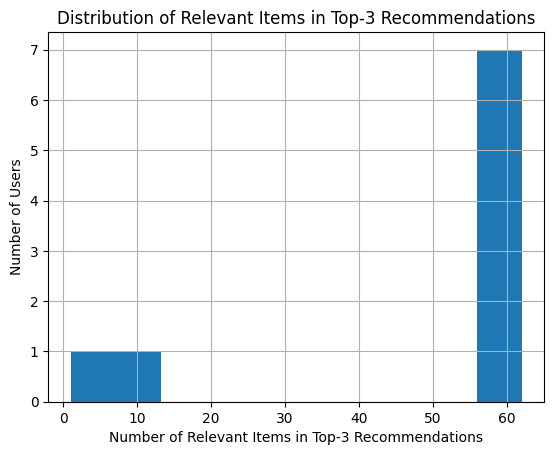

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (assuming you have true interactions and predicted interactions)
true_interactions = {
    0: [(289.0, 1.0), (10.0, 3.0), (58.0, 5.0), (61.0, 6.0), (26.0, 7.0), (64.0, 8.0), (93.0, 9.0), (185.0, 10.0), (245.0, 12.0), (47.0, 13.0), (76.0, 15.0), (164.0, 16.0), (296.0, 17.0), (307.0, 18.0), (285.0, 19.0), (290.0, 20.0), (6.0, 21.0), (156.0, 22.0), (165.0, 23.0), (169.0, 25.0), (74.0, 27.0), (105.0, 29.0), (138.0, 31.0), (207.0, 32.0), (77.0, 36.0), (174.0, 38.0), (114.0, 41.0), (34.0, 42.0), (275.0, 43.0), (252.0, 44.0), (109.0, 45.0), (4.0, 46.0), (83.0, 47.0), (260.0, 48.0), (94.0, 49.0), (102.0, 50.0), (46.0, 52.0), (18.0, 54.0), (198.0, 56.0), (120.0, 57.0), (43.0, 59.0), (25.0, 62.0), (180.0, 63.0), (243.0, 64.0), (298.0, 65.0), (197.0, 67.0), (227.0, 68.0), (8.0, 69.0), (287.0, 70.0), (78.0, 71.0), (115.0, 76.0), (240.0, 77.0), (146.0, 78.0), (85.0, 81.0), (182.0, 82.0), (231.0, 84.0), (302.0, 85.0), (199.0, 86.0), (196.0, 88.0), (211.0, 89.0), (225.0, 90.0), (159.0, 91.0)],  
    1: [(289.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)], 
    2: [(289.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114)],
    3:[(89.0, 5), (289.0, 8), (289.0, 1), (289.0, 2), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    4: [(89.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    5: [(29.0, 5), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    6: [(259.0, 25), (29.0, 1), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    7: [(269.0, 75), (9.0, 17), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    8: [(279.0, 85), (2.0, 16), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],


}

predicted_interactions = {
    0: [(289.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (93.0, 5), (93.0, 13), (93.0, 15), (185.0, 5), (185.0, 10), (185.0, 15), (185.0, 30), (185.0, 21), (185.0, 13), (245.0, 66), (245.0, 10), (245.0, 15), (245.0, 21), (245.0, 5), (245.0, 13), (47.0, 192), (47.0, 52), (47.0, 118), (47.0, 126), (47.0, 69), (47.0, 68), (76.0, 118), (76.0, 126)],
    1: [(289.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    2: [(289.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (2, 4)], 
    3:[(89.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],  
    4: [(89.0, 65), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    5: [(29.0, 5), (289.0, 11), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    6: [(259.0, 26), (29.0, 12), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    7: [(269.0, 75), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],
    8: [(279.0, 85), (289.0, 10), (289.0, 15), (289.0, 21), (289.0, 5), (289.0, 13), (10.0, 179), (10.0, 114), (10.0, 103), (10.0, 96), (10.0, 97), (10.0, 225), (58.0, 18), (58.0, 27), (58.0, 207), (58.0, 168), (58.0, 78), (58.0, 96), (61.0, 175), (61.0, 42), (61.0, 10), (61.0, 5), (61.0, 13), (61.0, 15), (26.0, 89), (26.0, 10), (26.0, 15), (26.0, 21), (26.0, 5), (26.0, 13), (64.0, 220), (64.0, 75), (64.0, 10), (64.0, 5), (64.0, 13), (64.0, 15), (93.0, 235), (93.0, 39), (93.0, 10), (933.0, 5), (23.0, 103), (193.0, 10), (15.0, 65), (15.0, 10), (15.0, 19), (15.0, 3), (18.0, 25), (15.0, 18), (15.0, 66), (22.0, 1), (25.0, 15), (45.0, 22), (243.0, 45), (24.0, 33), (37.0, 162), (14.0, 51), (2.0, 18), (3.0, 12), (4.0, 9), (7.0, 69), (6.0, 119), (77.0, 128)],



}        

# Function to calculate precision at k
def precision_at_k(true_interactions, predicted_interactions, k):
  """
  Calculates precision at k for recommendations.

  Args:
      true_interactions (dict): Dictionary mapping user IDs to lists of true interactions (item IDs).
      predicted_interactions (dict): Dictionary mapping user IDs to lists of predicted interactions (item IDs).
      k (int): The number of top recommendations to consider.

  Returns:
      float: Average precision at k for all users.
  """
  total_precision = 0
  for user_id, true_items in true_interactions.items():
    relevant_count = 0
    for predicted_item in predicted_interactions[user_id][:k]:
      if predicted_item in true_items:
        relevant_count += 1
    total_precision += relevant_count / k
  return total_precision / len(true_interactions)

# Calculate precision at k (k=3)
k = 62
precision_k = precision_at_k(true_interactions, predicted_interactions, k)
print(f"Precision at {k}: {precision_k:.4f}")

# Function to calculate relevance counts for histogram
def get_relevance_counts(true_interactions, predicted_interactions, k):
  """
  Calculates the number of relevant items within the top k recommendations for each user.

  Args:
      true_interactions (dict): Dictionary mapping user IDs to lists of true interactions (item IDs).
      predicted_interactions (dict): Dictionary mapping user IDs to lists of predicted interactions (item IDs).
      k (int): The number of top recommendations to consider.

  Returns:
      list: List of counts of relevant items within the top k recommendations for each user.
  """
  relevance_counts = []
  for user_id, true_items in true_interactions.items():
    relevant_count = 0
    for predicted_item in predicted_interactions[user_id][:k]:
      if predicted_item in true_items:
        relevant_count += 1
    relevance_counts.append(relevant_count)
  return relevance_counts

# Calculate relevance counts for histogram (k=3)
relevance_counts = get_relevance_counts(true_interactions, predicted_interactions, k)

# Create the histogram
plt.hist(relevance_counts)
plt.xlabel("Number of Relevant Items in Top-3 Recommendations")
plt.ylabel("Number of Users")
plt.title("Distribution of Relevant Items in Top-3 Recommendations")
plt.grid(True)
plt.show()

